### Understanding Problem Statement
- The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the
> ">50K group or <=50K group."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df  = pd.read_csv('/workspaces/adultCensus/data/adult.csv')
df.head()
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
for feature in df.columns:
    print(f"{feature} has {df[feature].unique()} unique values \n \n {('*')*120} \n")

age has [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] unique values 
 
 ************************************************************************************************************************ 

workclass has ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] unique values 
 
 ************************************************************************************************************************ 

fnlwgt has [ 77516  83311 215646 ...  34066  84661 257302] unique values 
 
 ************************************************************************************************************************ 

education has ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'


 0   age             32561 non-null  int64  -> numerical, discrete
 1   workclass       32561 non-null  object -> categorical, nominal, Polytomous
 2   fnlwgt          32561 non-null  int64  -> numerical, discrete
 3   education       32561 non-null  object -> categorical, ordinal
 4   education-num   32561 non-null  int64  -> categorical, ordinal
 5   marital-status  32561 non-null  object -> categorical, nominal, polytomous
 6   occupation      32561 non-null  object -> categorical, nominal, polytomous 
 7   relationship    32561 non-null  object -> categorical, nominal, polytomous
 8   race            32561 non-null  object -> categorical, nominal, polytomous
 9   sex             32561 non-null  object -> categorical, nominal, dichotomous
 10  capital-gain    32561 non-null  int64  -> numerical, discrete
 11  capital-loss    32561 non-null  int64  -> numerical, discrete
 12  hours-per-week  32561 non-null  int64  -> numerical, discrete
 13  country         32561 non-null  object -> categorical, nominal, polytomous
 14  salary          32561 non-null  object -> categorical, nominal, dichotomous

- As education is already mapped with the education-num, hence dropping education column

In [4]:
edu_grouped = df[['education','education-num']].groupby('education-num')
edu_grouped.value_counts()

education-num  education   
1              Preschool          51
2              1st-4th           168
3              5th-6th           333
4              7th-8th           646
5              9th               514
6              10th              933
7              11th             1175
8              12th              433
9              HS-grad         10501
10             Some-college     7291
11             Assoc-voc        1382
12             Assoc-acdm       1067
13             Bachelors        5355
14             Masters          1723
15             Prof-school       576
16             Doctorate         413
dtype: int64

In [5]:
df.drop(['education'],axis=1,inplace=True)

### Handling Null Values
- columns country,occupation and workclass has "?" values

### Seperating Numerical and Categorical Variables

In [6]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_df = df[numerical_features]
categorical_df = df[categorical_features]
from sklearn.impute import SimpleImputer
Numimputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Catimputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
Numimputer.fit_transform(numerical_df)
Catimputer.fit_transform(categorical_df)

array([['State-gov', 'Never-married', 'Adm-clerical', ..., 'Male',
        'United-States', '<=50K'],
       ['Self-emp-not-inc', 'Married-civ-spouse', 'Exec-managerial', ...,
        'Male', 'United-States', '<=50K'],
       ['Private', 'Divorced', 'Handlers-cleaners', ..., 'Male',
        'United-States', '<=50K'],
       ...,
       ['Private', 'Widowed', 'Adm-clerical', ..., 'Female',
        'United-States', '<=50K'],
       ['Private', 'Never-married', 'Adm-clerical', ..., 'Male',
        'United-States', '<=50K'],
       ['Self-emp-inc', 'Married-civ-spouse', 'Exec-managerial', ...,
        'Female', 'United-States', '>50K']], dtype=object)

- Checking distribution on numerical features

/tmp/ipykernel_3572/487052181.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
/tmp/ipykernel_3572/487052181.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
/tmp/ipykernel_3572/487052181.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
/tmp/ipykernel_3572/487052181.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_features

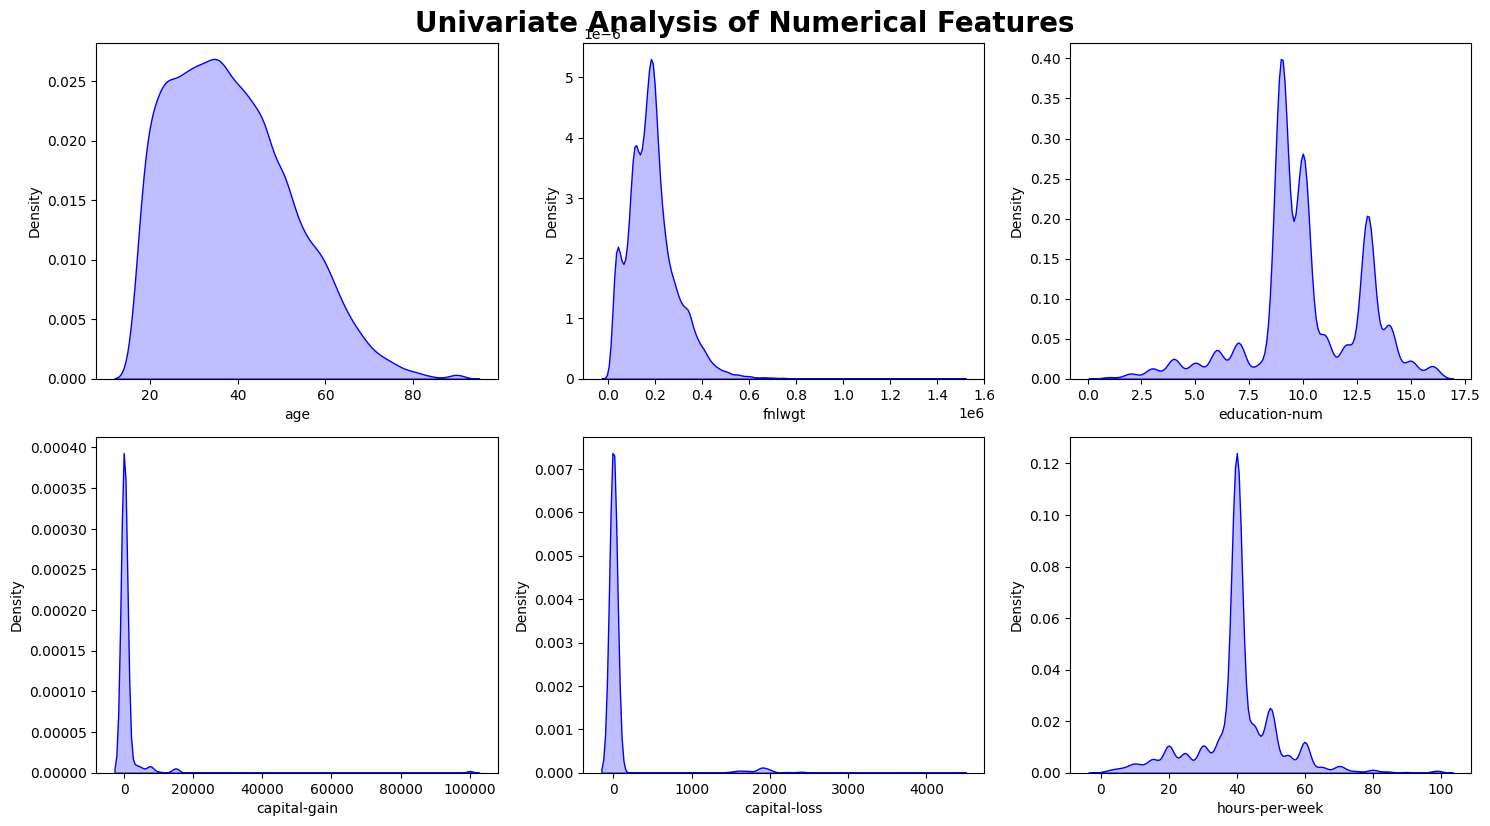

In [7]:
import seaborn as sns
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold')

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

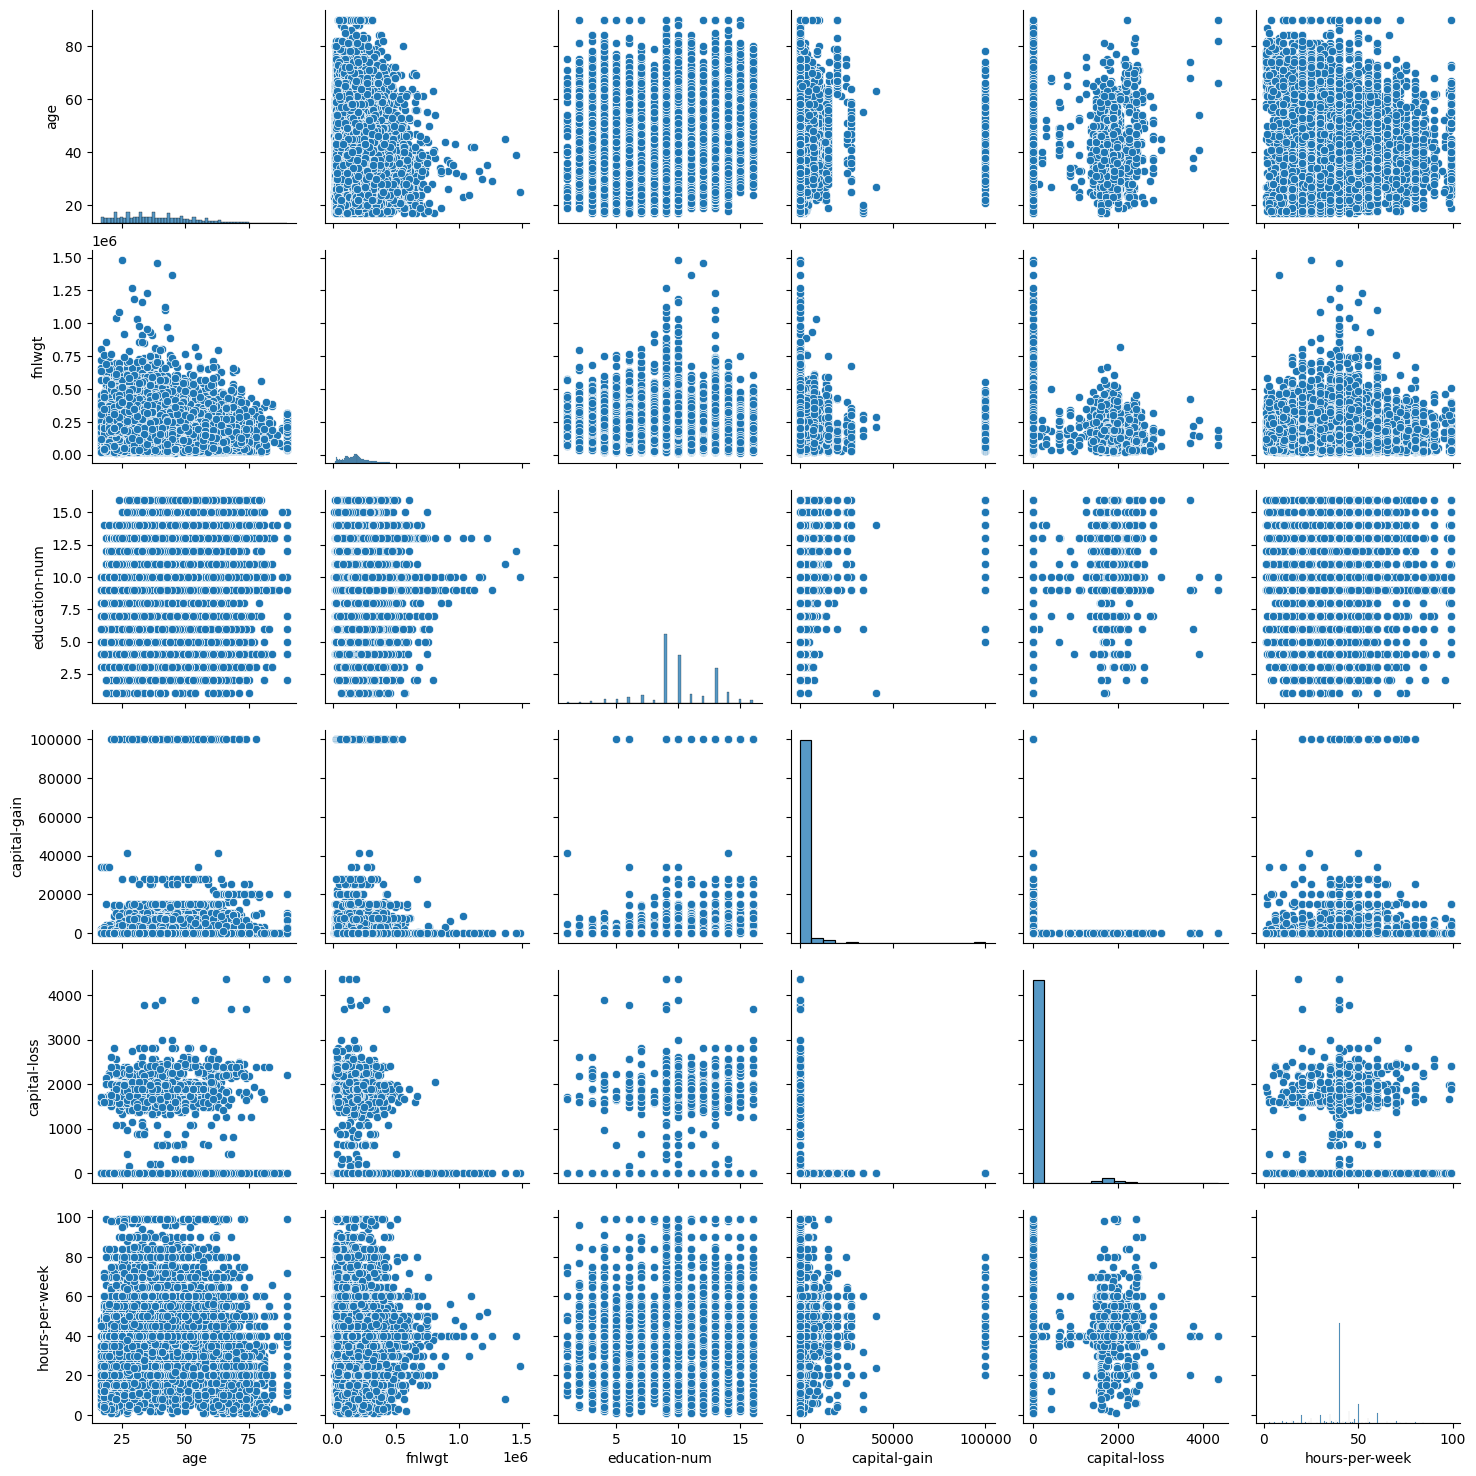

In [8]:
sns.pairplot(df[numerical_features])

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

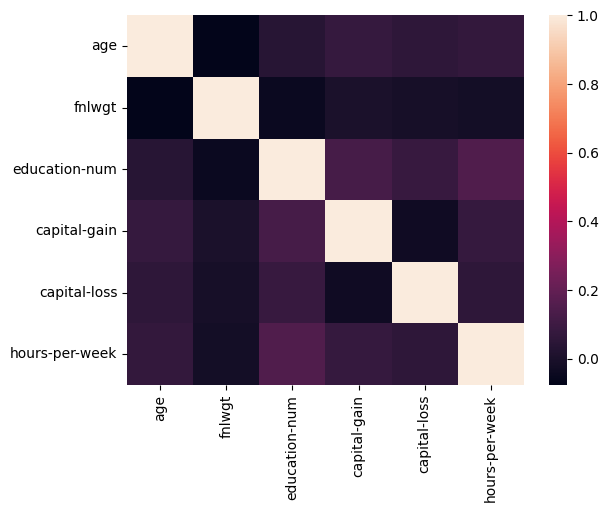

In [9]:
correlation = df[numerical_features].corr()
sns.heatmap(correlation)
categorical_features

In [10]:
# plt.figure(figsize=(20, 15))
# plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold')

# for i in range(0, len(categorical_features)):
#     plt.subplot(5,2 , i+1)
#     sns.countplot(x=df[categorical_features[i]],palette="Set2")
#     plt.xlabel(categorical_features[i])
#     plt.xticks(rotation=45)
#     plt.tight_layout() 

#### checking Normal Distribution using shapriro wick test

In [11]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import shapiro
shapiro_wick_test = []
for column in numerical_features:
    dataToTest = numerical_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[numerical_features ,shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

/home/codespace/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Column Name,Shapiro Hypothesis Result
0,age,Not Normally Distributed
1,fnlwgt,Not Normally Distributed
2,education-num,Not Normally Distributed
3,capital-gain,Not Normally Distributed
4,capital-loss,Not Normally Distributed
5,hours-per-week,Not Normally Distributed


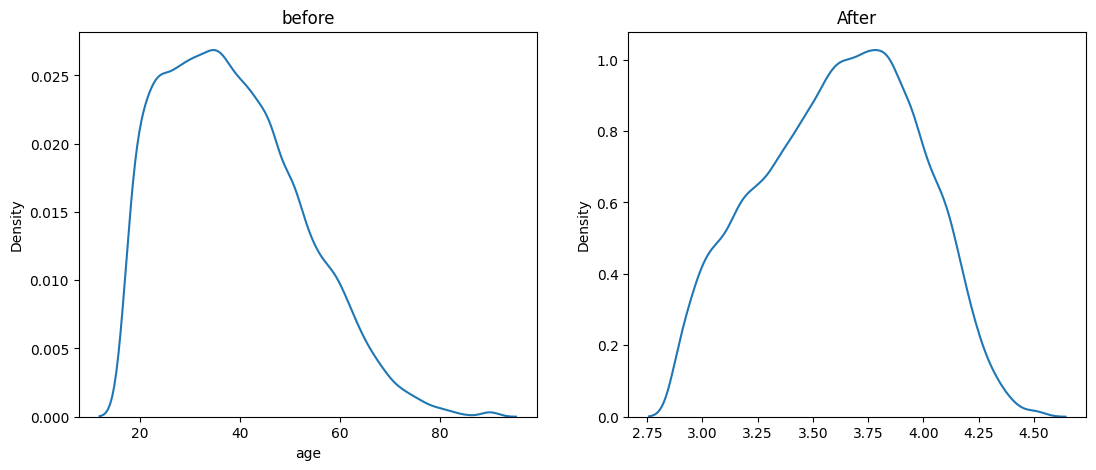

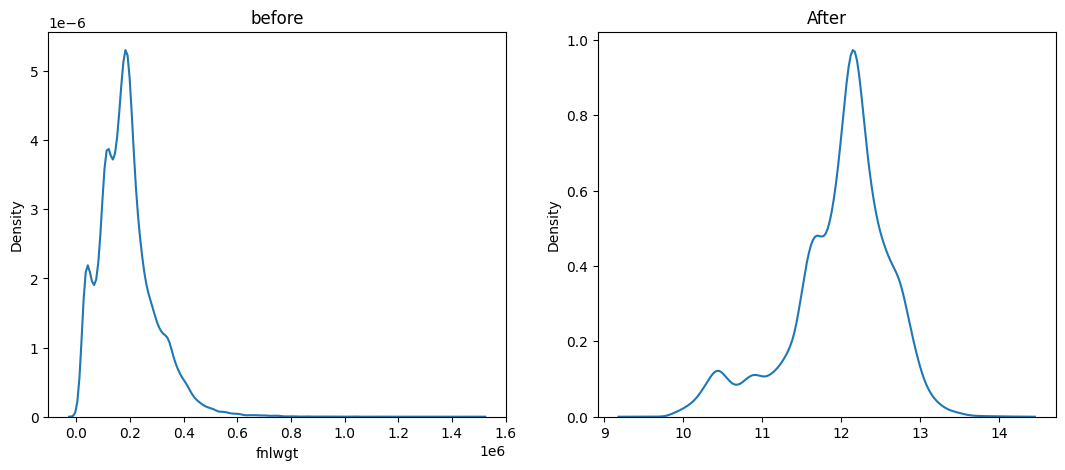

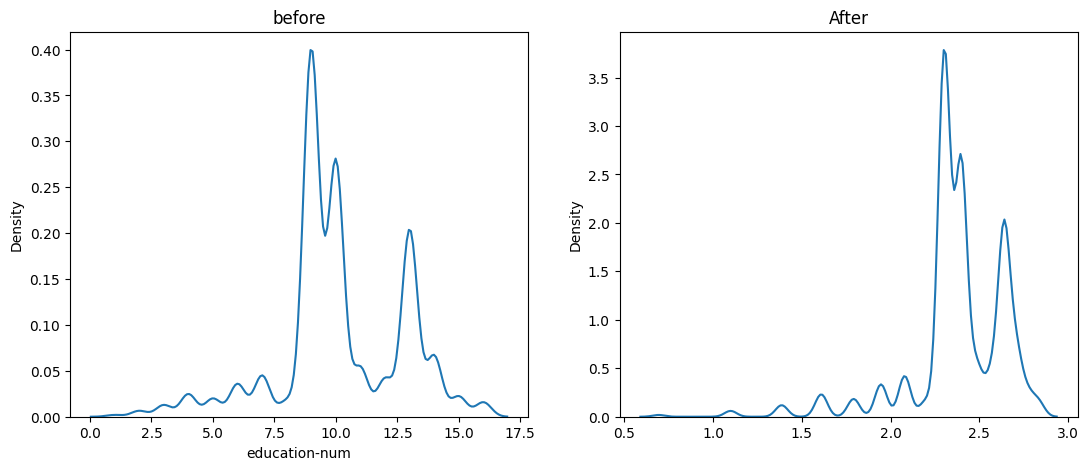

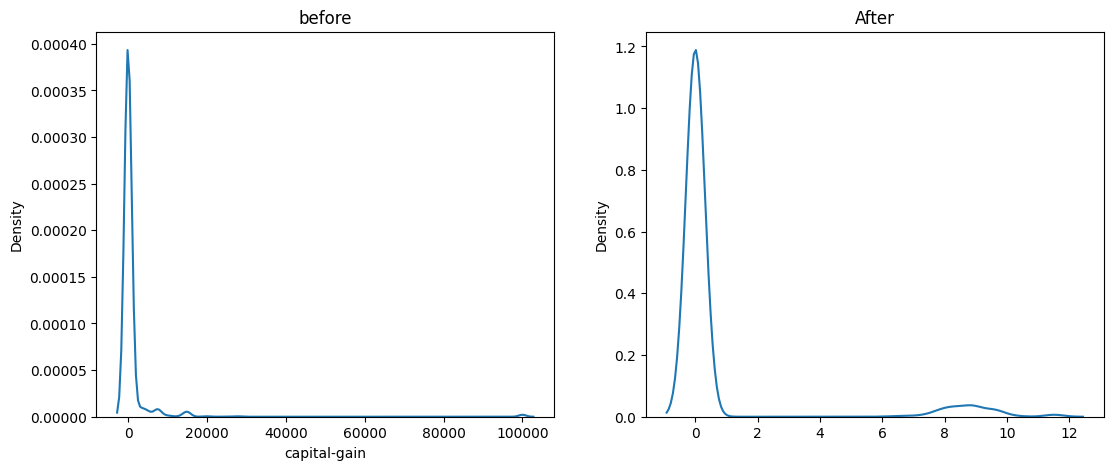

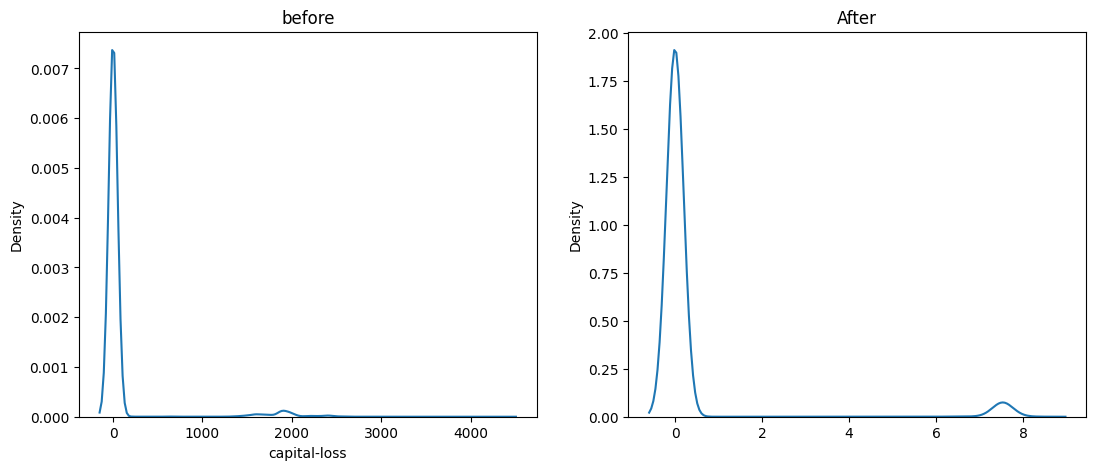

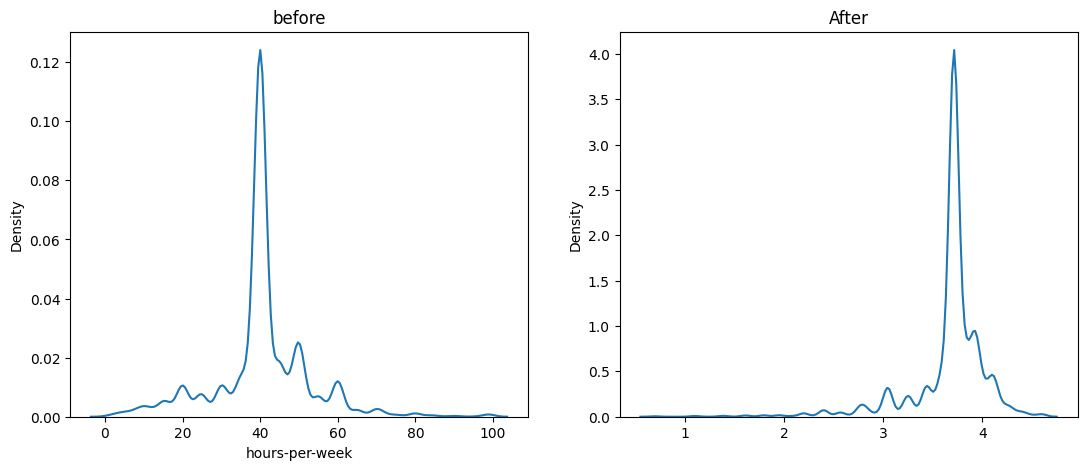

In [12]:
def plots(data,var,transformer):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(data[var])
    plt.title('before' )
    plt.subplot(122)
    sns.kdeplot(transformer)
    plt.title('After')
log_transformer = FunctionTransformer(np.log1p)
for col in numerical_features:
    X = np.array(df[col])
    Y = log_transformer.transform(X)
    plots(df,col,Y)




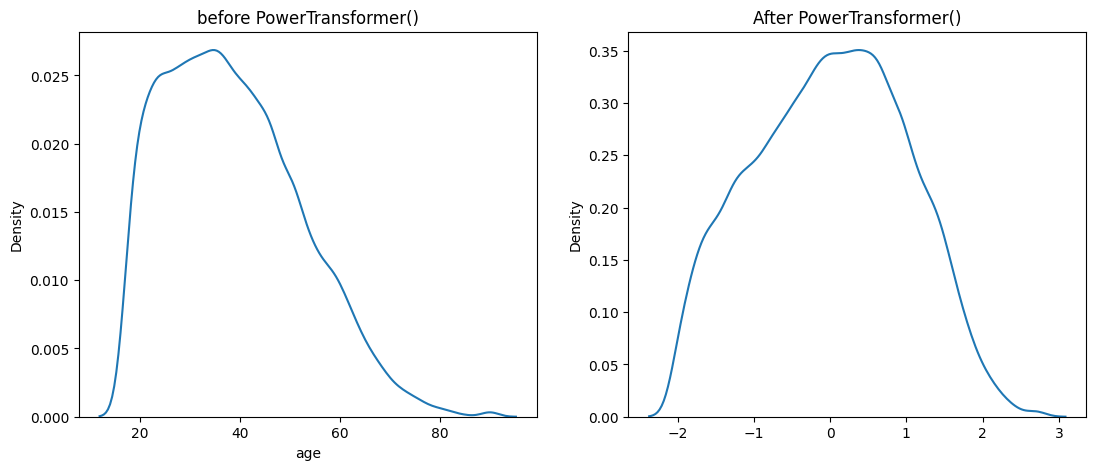

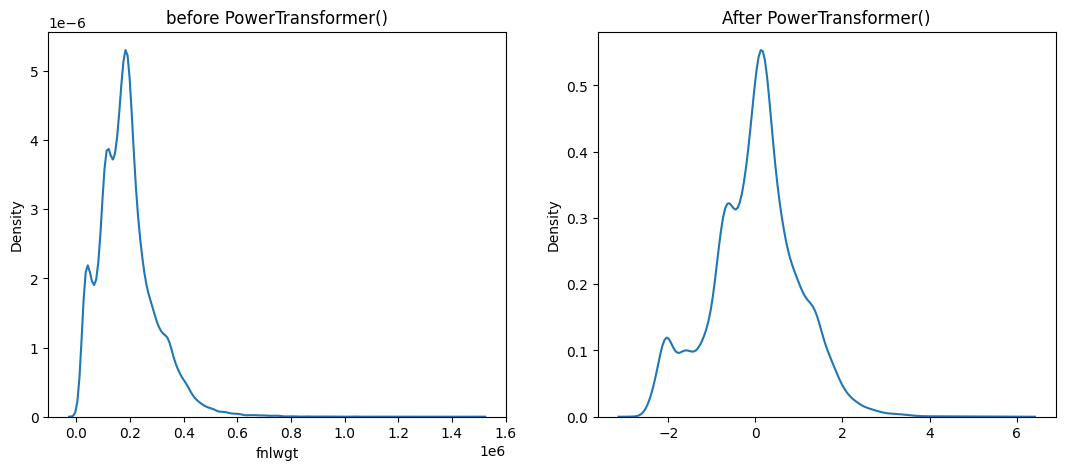

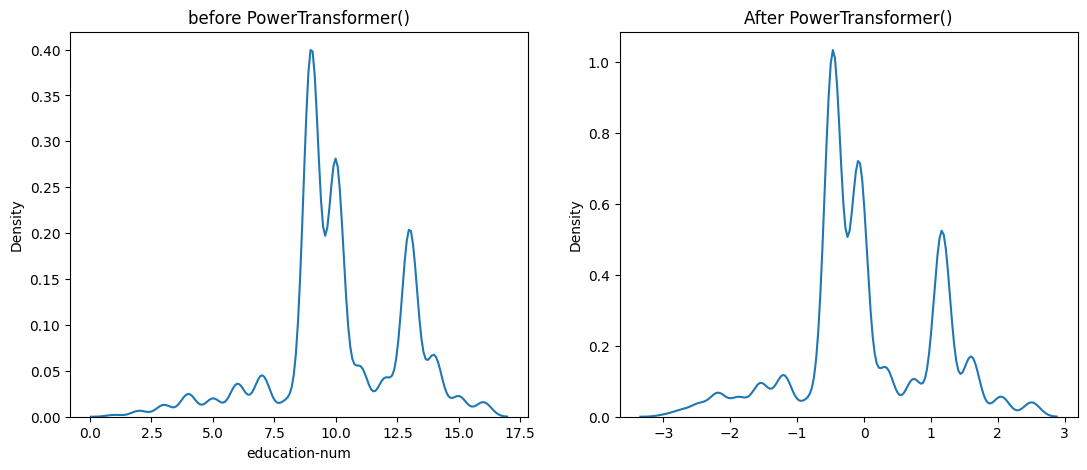

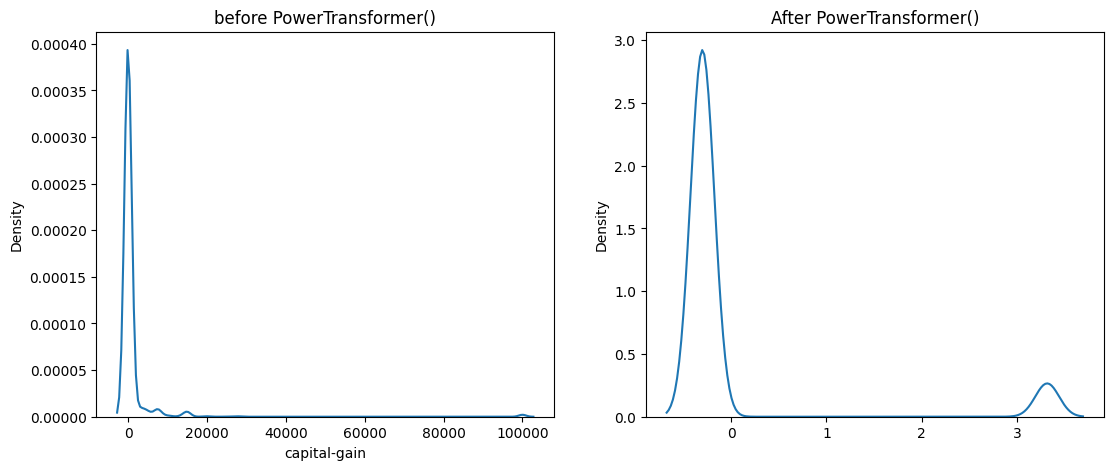

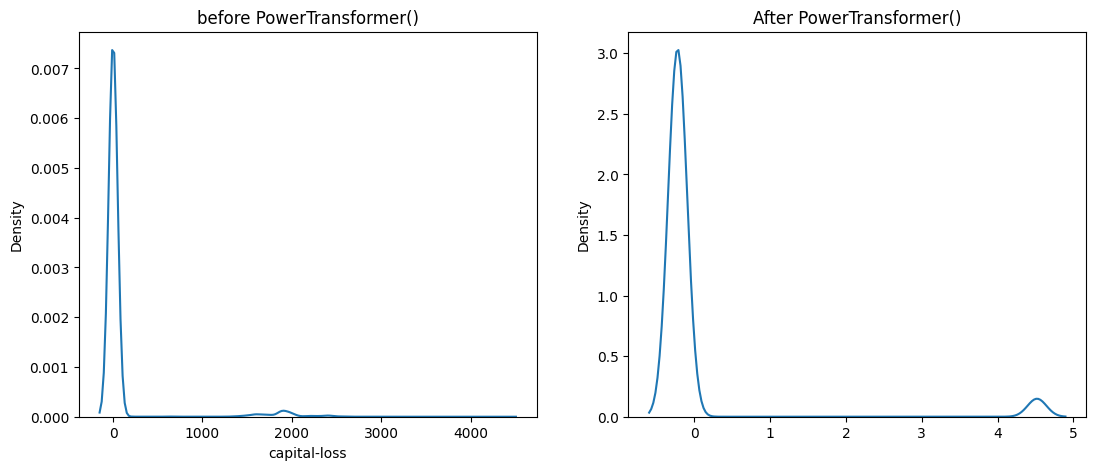

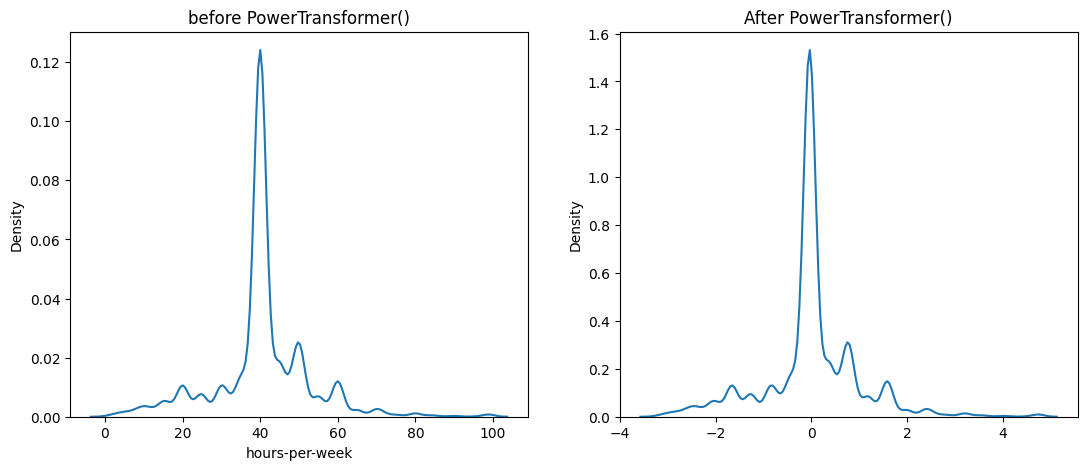

In [13]:
def power_plots(data,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(data[var])
    plt.title('before ' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(data[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(t))
for col in numerical_features:
    power_plots(df,col,PowerTransformer())

### Outlier Detection
1. Z Score Method

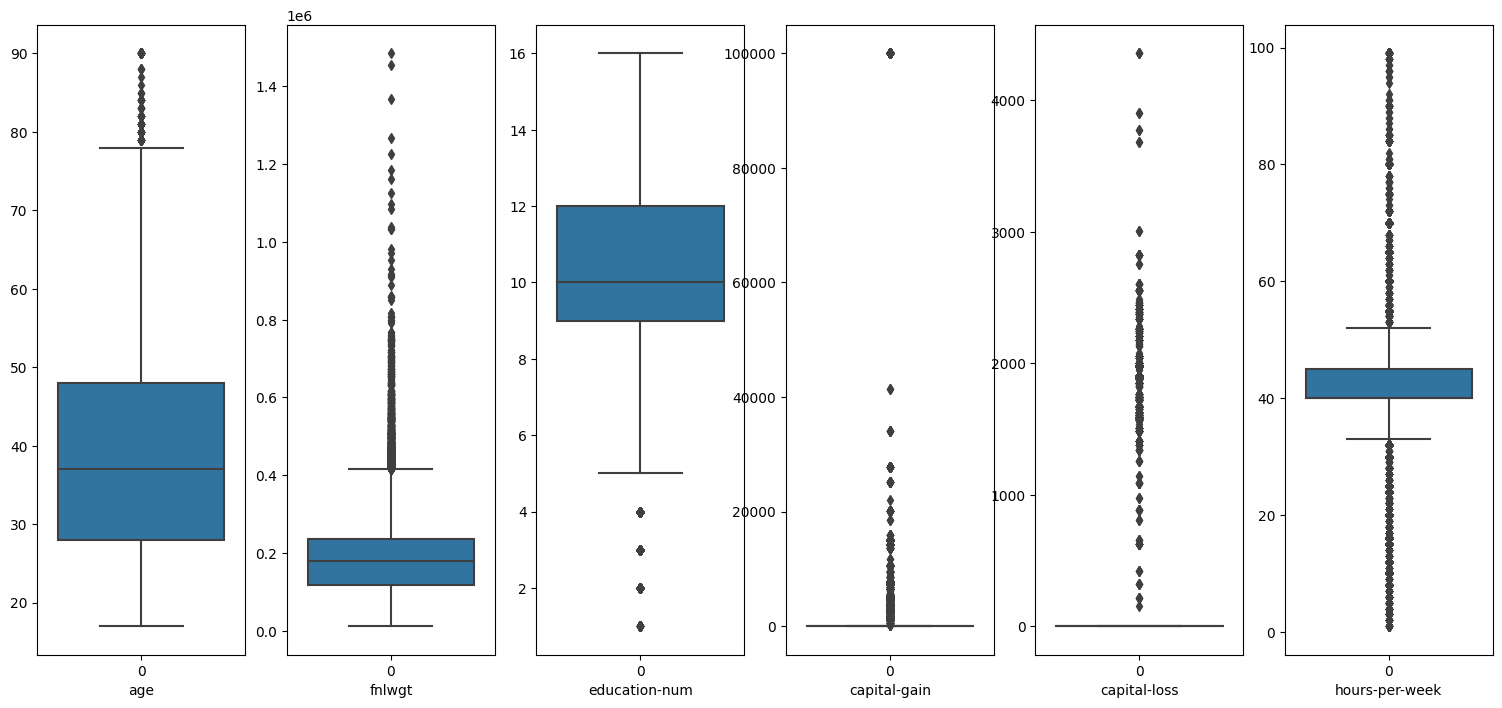

In [14]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

plt.figure(figsize=(22,18))
for i,col in enumerate(numerical_df.columns):
    plt.subplot(2,7,i+1)
    sns.boxplot(numerical_df[col])
    plt.xlabel(str(numerical_df.columns[i]))

In [15]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
replace_with_thresholds(numerical_df,numerical_df.columns)

/tmp/ipykernel_3572/1530938293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_3572/1530938293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


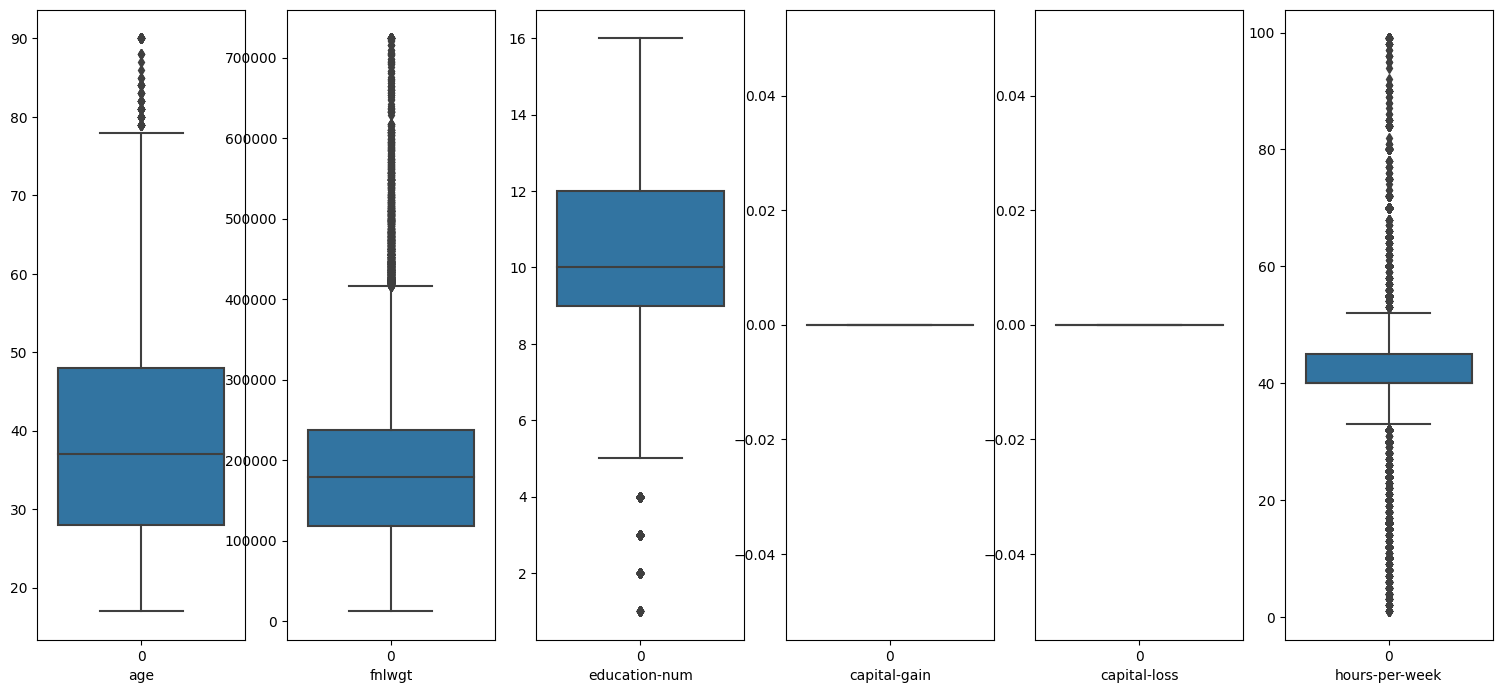

In [16]:
plt.figure(figsize=(22,18))
for i,col in enumerate(numerical_df.columns):
    plt.subplot(2,7,i+1)
    sns.boxplot(numerical_df[col])
    plt.xlabel(str(numerical_df.columns[i]))

2. IQR Method

percentile25 28.0
percentile75 48.0
Upper limit 78.0
Lower limit -2.0


/tmp/ipykernel_3572/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_3572/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])


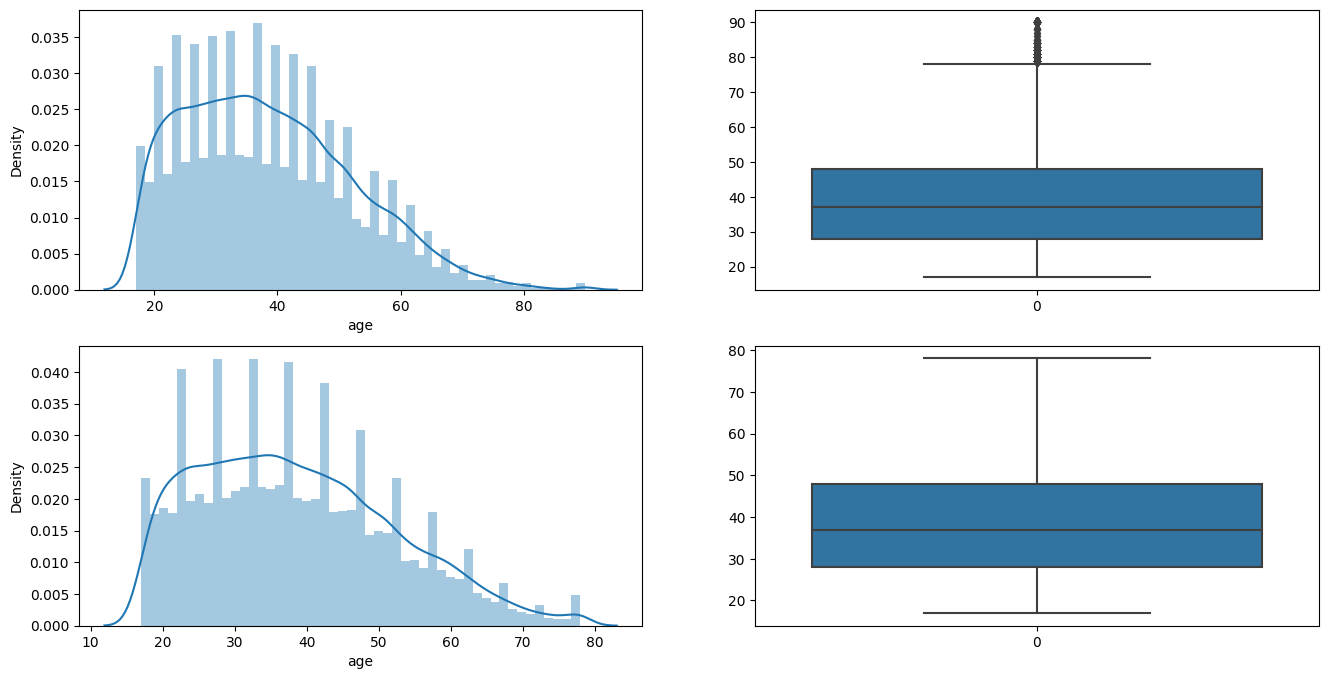

percentile25 117827.0
percentile75 237051.0
Upper limit 415887.0
Lower limit -61009.0


/tmp/ipykernel_3572/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_3572/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])


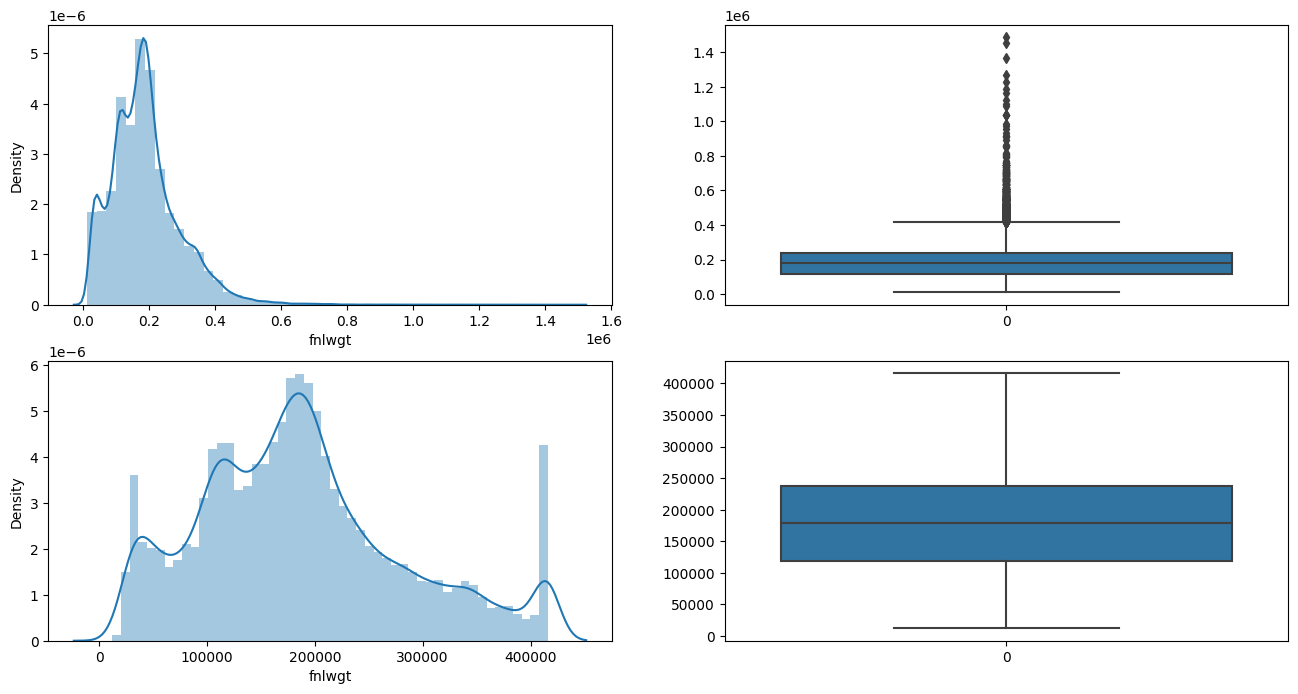

percentile25 9.0
percentile75 12.0
Upper limit 16.5
Lower limit 4.5


/tmp/ipykernel_3572/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_3572/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])


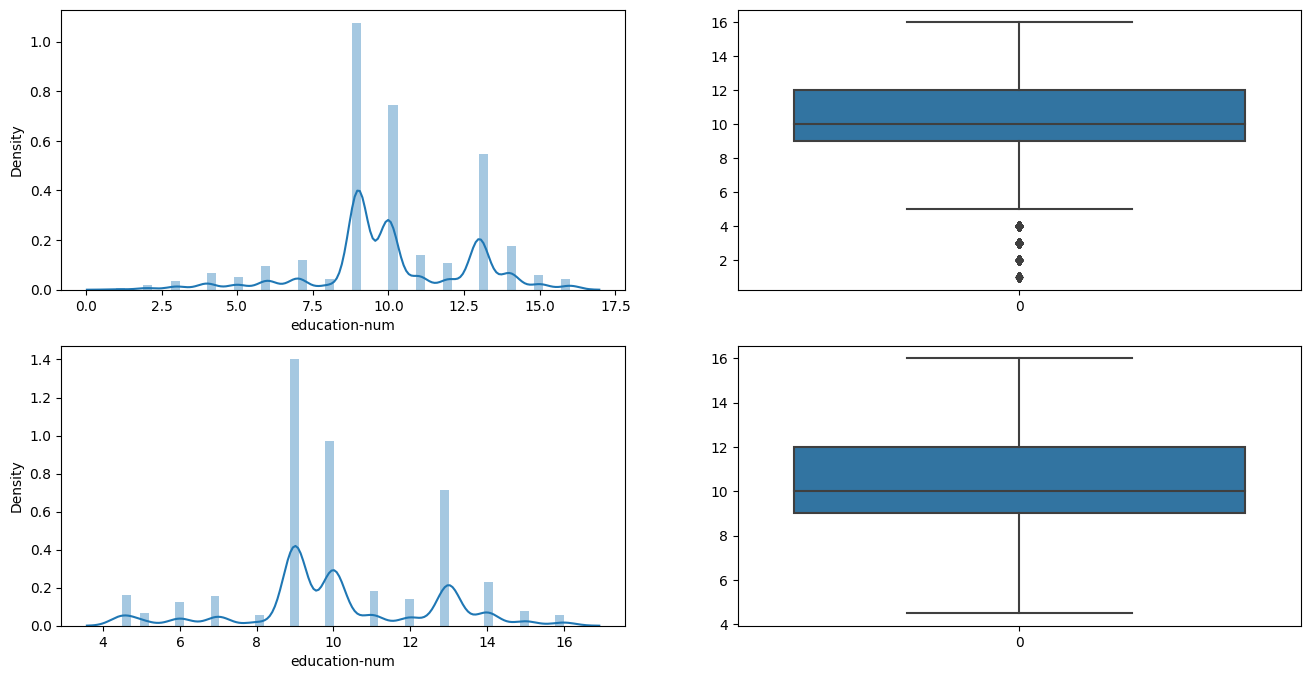

percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0


/tmp/ipykernel_3572/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_3572/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
/home/codespace/.local/lib/python3.10/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset

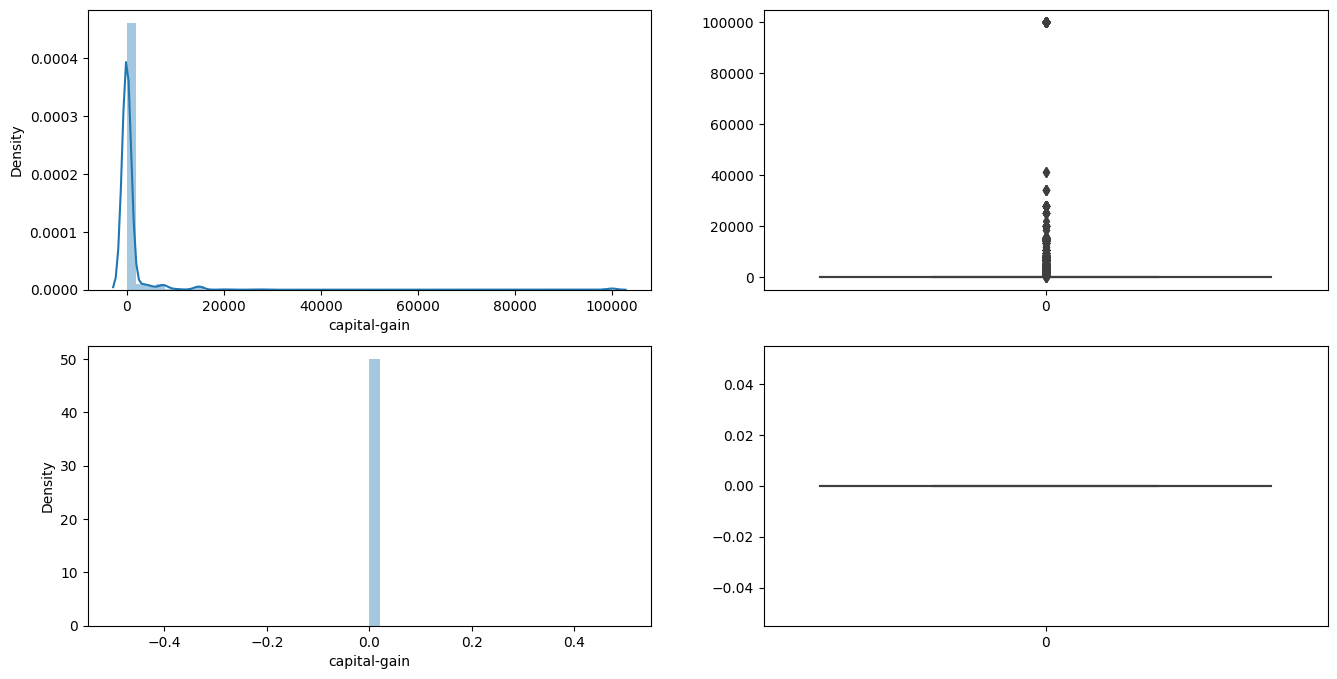

percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0


/tmp/ipykernel_3572/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_3572/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
/home/codespace/.local/lib/python3.10/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset

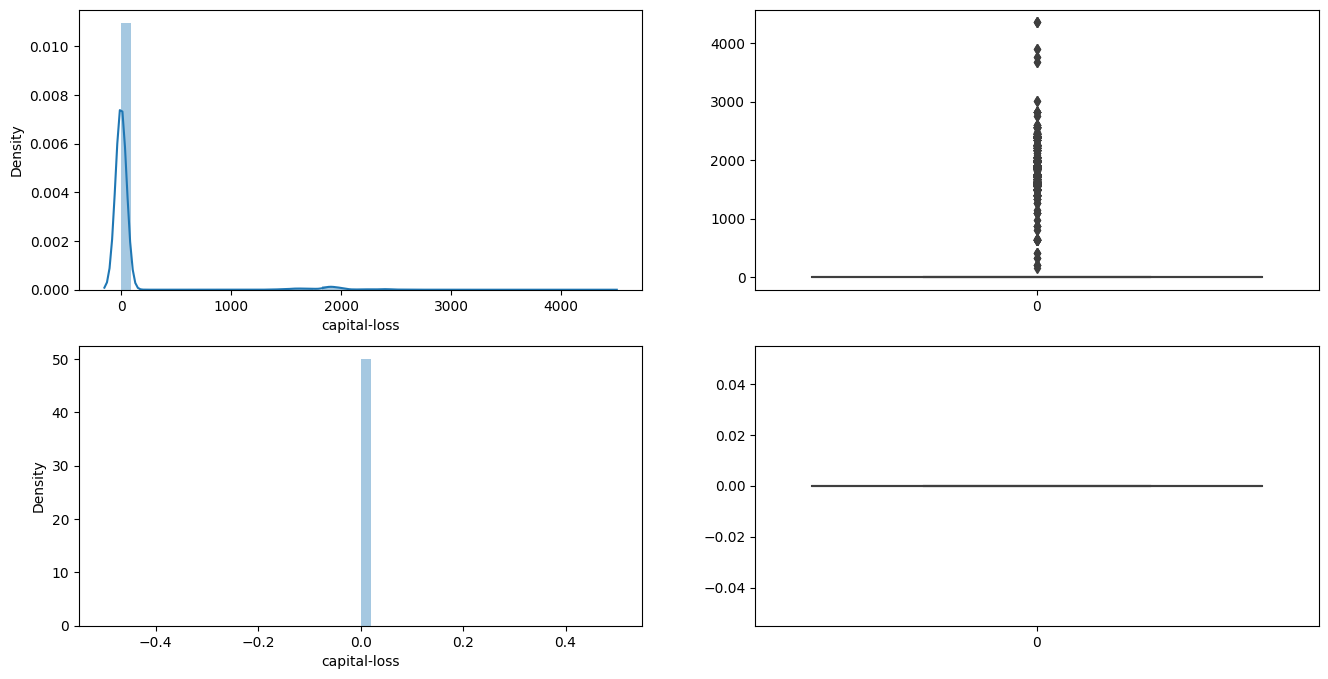

percentile25 40.0
percentile75 45.0
Upper limit 52.5
Lower limit 32.5


/tmp/ipykernel_3572/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_3572/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])


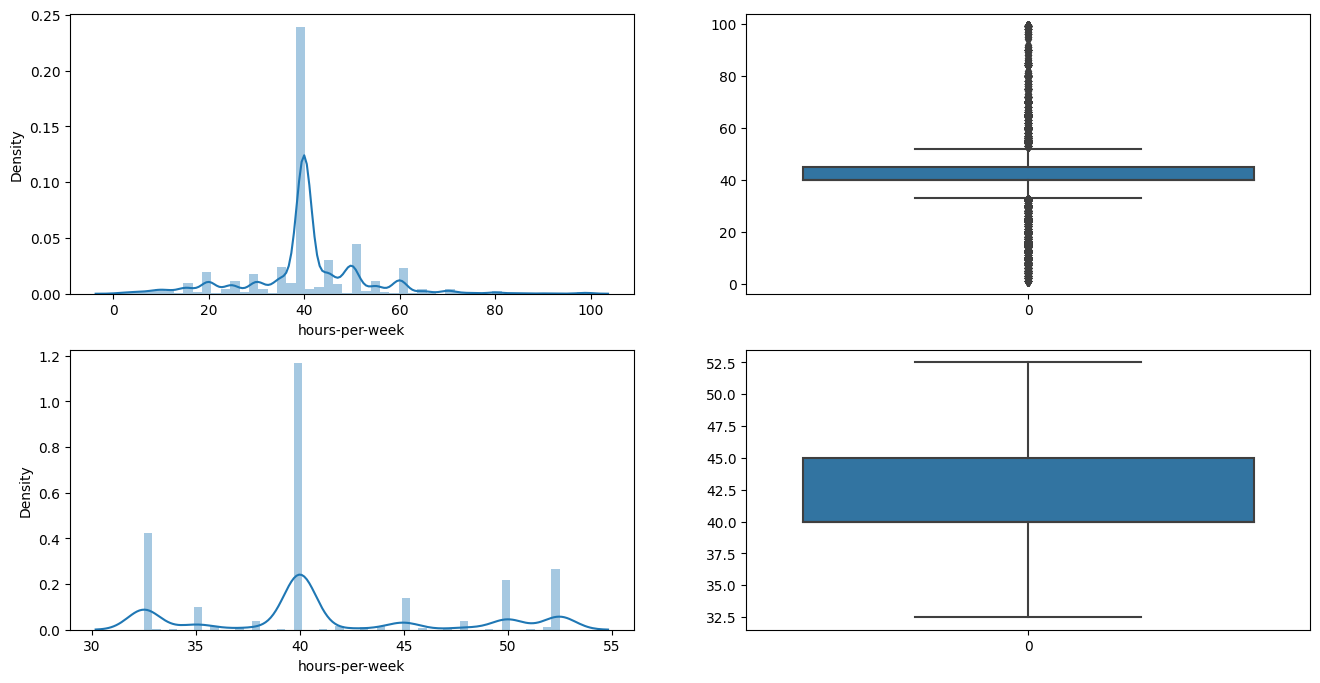

In [17]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]


def create_comparison_plot(data,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(data[column])

    plt.subplot(2,2,2)
    sns.boxplot(data[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

for features in numerical_df.columns:
    remove_outliers_IQR(features)
    create_comparison_plot(df,df1,features)


In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from adult.logger import logging
from sklearn.compose import ColumnTransformer
num_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="mean"),StandardScaler() )
cat_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="most_frequent"), OneHotEncoder(sparse=False,handle_unknown='ignore'), StandardScaler(with_mean=False))

logging.info(f"Numerical Columns are {numerical_features}")
logging.info(f"Categorical Columns are {categorical_features}")
preprocessing = ColumnTransformer([("num_pipeline", num_pipeline, numerical_features),
                                    ("cat_cols", cat_pipeline,categorical_features)])
df1['capital-loss'] = df['capital-loss']
df1['capital-gain'] = df['capital-gain']
Split = StratifiedShuffleSplit(n_splits=10,test_size=0.3)
for train_index,test_index in Split.split(X=df,y=df['salary']):
    strat_train_set = df1.loc[train_index]
    strat_test_set = df1.loc[test_index]
Xtrain, yTrain, Xtest, yTest = strat_train_set.drop(columns=['salary'], axis=1), strat_train_set['salary'], strat_test_set.drop(columns=['salary'], axis=1), strat_test_set['salary']

categorical_features, numerical_features


(['workclass',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'country',
  'salary'],
 ['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'])

In [19]:
import yaml
from adult.exception import AdultException
from adult.constant import *
from adult.util.util import read_yaml_file
import os, sys
import pandas as pd
import numpy as np
import dill
def load_data(file_path:str, schema_file_path:str)-> pd.DataFrame:
    try:
        schema_file = read_yaml_file(schema_file_path)
        schema_cols = schema_file[SCHEMA_COLUMNS_KEY]

        df = pd.read_csv(file_path)
        error_message = ""

        for col in df.columns:
            if col in list(schema_cols):
                df[col].astype(schema_cols[col])

            else:
                error_message = f"{[col]} is not in the schema"

        if len(error_message) > 0:
            raise Exception(error_message)

        return df
    except Exception as e:
        raise AdultException(e,sys) from e

file_path = "/workspaces/adultCensus/adult/artifact/data_ingestion/2022-12-07-09-02-34/ingested_data/train/adult.csv"
schema_path = "/workspaces/adultCensus/config/schema.yaml"
load_data(file_path, schema_path)

AdultException: 
        Error occured in script: 
        [ /tmp/ipykernel_3572/3047377817.py ] at 
        try block line number: [14] and exception block line number: [29] 
        error message: [[Errno 2] No such file or directory: '/workspaces/adultCensus/adult/artifact/data_ingestion/2022-12-07-09-02-34/ingested_data/train/adult.csv']
        

In [4]:
from adult.entity.artifact_entity import DataIngestionArtifact, DataTransformationArtifact, DataValidationArtifact
from adult.entity.config_entity import DataTransformationConfig
import numpy as np
import pandas as pd
from adult.constant import *
from adult.util.util import read_yaml_file, load_data, save_numpy_array_data, save_object
from adult.logger import logging
from adult.exception import AdultException
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import os,sys
schema_path = "/workspaces/adultCensus/config/schema.yaml"
train_file_path = "/workspaces/adultCensus/adult/artifact/data_ingestion/2022-12-08-05-32-28/ingested_data/train/adult.csv"
test_file_path = "/workspaces/adultCensus/adult/artifact/data_ingestion/2022-12-08-05-32-28/ingested_data/test/adult.csv"
def get_transformed_object()->ColumnTransformer:
    schema_data = "/workspaces/adultCensus/config/schema.yaml"
    data_schema = read_yaml_file(schema_data)

    num_cols = data_schema[SCHEMA_NUMERICAL_COLUMNS]
    cat_cols = data_schema[SCHEMA_CATEGORICAL_COLUMNS]
    

    num_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="mean"),StandardScaler() )
    cat_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="most_frequent"), OneHotEncoder(sparse=False,handle_unknown='ignore'), StandardScaler(with_mean=False))
    

    logging.info(f"Numerical Columns are {num_cols}")
    logging.info(f"Categorical Columns are {cat_cols}")
    preprocessing = ColumnTransformer([("num_pipeline", num_pipeline, num_cols),
                                        ("cat_cols", cat_pipeline, cat_cols),])
    return preprocessing
lol = get_transformed_object()

train_df = load_data(file_path = train_file_path, schema_file_path=schema_path)
test_df = load_data(file_path=test_file_path,schema_file_path=schema_path)
schema = read_yaml_file(schema_path)
target_column = schema[SCHEMA_TARGET_COLUMN]

input_feature_train_df = train_df.drop(columns=[target_column],axis=1)
target_feature_train_df = train_df[target_column]

input_feature_test_df = test_df.drop(columns=[target_column],axis=1)
target_feature_test_df = test_df[target_column]

input_feature_train_arr = lol.fit_transform(input_feature_train_df)
input_feature_test_arr = lol.transform(input_feature_test_df)
label = LabelEncoder()
label.fit_transform(target_feature_train_df)
label.transform(target_feature_test_df)
            

array([1, 0, 0, ..., 0, 1, 0])